# Test ID003 : Generating Waypoints throught A*

<b>
HYP: Test if we can generate waypoints through A* if the size and an image of the map is given to us
</b>

<b>
DEV: Take image of the map , compute the distances and generate and A* waypoint list
</b>

In [1]:
import numpy as np
import heapq
%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from PIL import Image
import cv2
from test_id003 import *

In [2]:
#plt.imshow(temp)

# Converting input image

Loading Map

In [3]:
######################################
import cv2
import numpy as np
import matplotlib.pyplot as plt
 
img_re = cv2.imread('Town01.png', cv2.IMREAD_GRAYSCALE)
size = np.size(img_re)
skel = np.zeros(img_re.shape,np.uint8)
 
img = cv2.threshold(img_re,254,255,0, cv2.THRESH_BINARY)[1]
element = cv2.getStructuringElement(cv2.MORPH_CROSS,(60,60))
element_2 = cv2.getStructuringElement(cv2.MORPH_CROSS,(15,15))
done = False
 
while( not done):
    eroded = cv2.erode(img,element)
    temp = cv2.dilate(eroded,element)
    temp = cv2.subtract(img,temp)
    skel = cv2.bitwise_or(skel,temp)
    img = eroded.copy()
 
    zeros = size - cv2.countNonZero(img)
    if zeros==size:
        done = True
 
skel_2 = cv2.bitwise_not(skel)
skel_3 = cv2.threshold(skel_2,254,1,0 ,cv2.THRESH_BINARY)[1]
skel_4 =  cv2.dilate(skel_3,element_2)

<IPython.core.display.Javascript object>


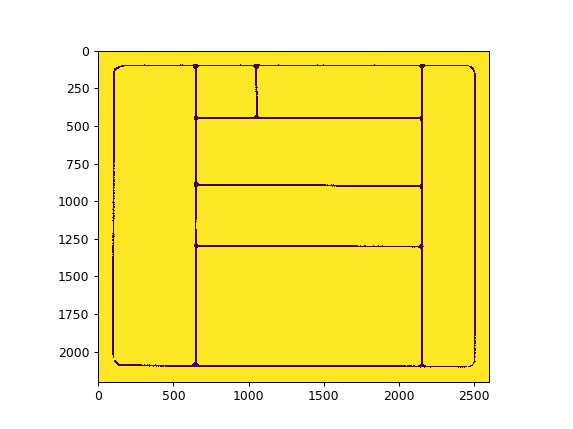

In [4]:
plt.imshow(skel_4)

<IPython.core.display.Javascript object>


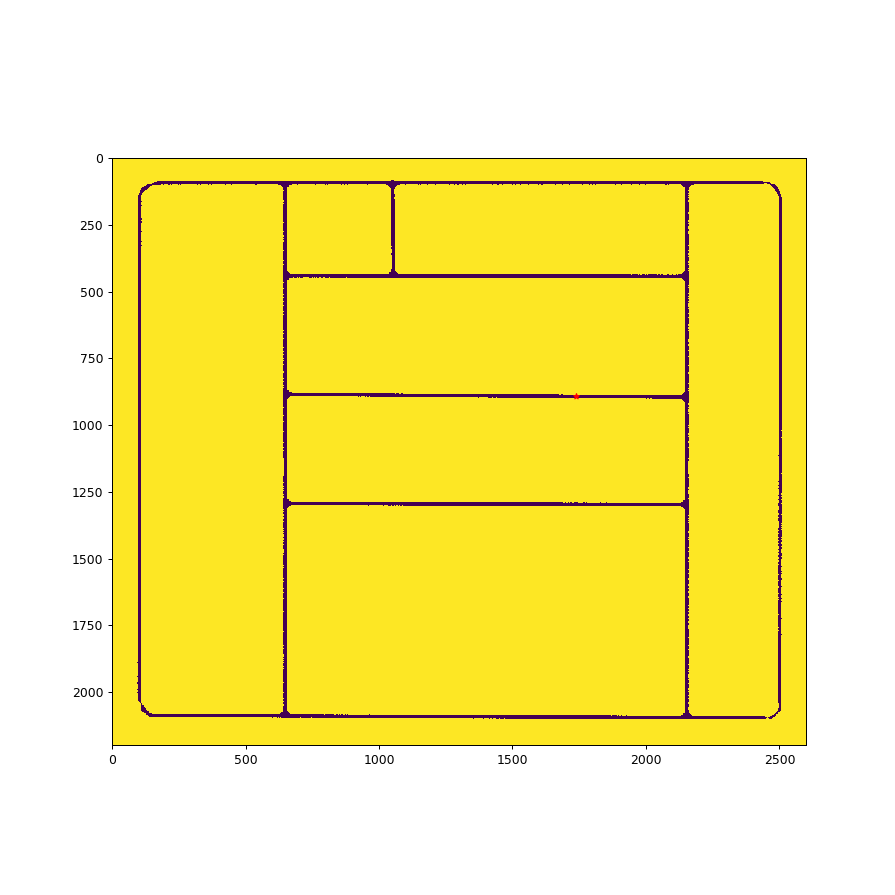

x  1737
y  891
(891, 1737)


In [6]:
world_start_location = np.array([269,130])

world_to_map_translation = np.array([0, 0])
map_offset = np.array([-16.43022, -16.43022])
cm_per_pixel = 0.1643
relative_location = world_start_location + world_to_map_translation - map_offset
pixel_coord = relative_location // cm_per_pixel

start_loc = ( int(pixel_coord[1]), int(pixel_coord[0]))
fig, ax = plt.subplots(figsize=(10,10))
print("x ", start_loc[1])
print("y " , start_loc[0])
ax.imshow((skel_4))
print(start_loc)
ax.scatter(start_loc[1],start_loc[0], marker = "*", color = "red", s = 20)
goal_loc = []

def onclick(event):
    global ix, iy
    ix, iy = event.xdata, event.ydata
    print ('x = %d, y = %d'%(
        ix, iy))

    global goal_loc
    goal_loc.append(ix)
    goal_loc.append(iy)

    if len(goal_loc) == 2:
        fig.canvas.mpl_disconnect(cid)

    return goal_loc
cid = fig.canvas.mpl_connect('button_press_event', onclick)

In [7]:
goal_loc  = int(goal_loc[1]),int(goal_loc[0])

In [8]:
print(start_loc)

(891, 1737)


# A* algorithm

[(891, 1737), (891, 1736), (891, 1735), (891, 1734), (891, 1733), (891, 1732), (891, 1731), (891, 1730), (891, 1729), (891, 1728), (891, 1727), (891, 1726), (891, 1725), (891, 1724), (891, 1723), (891, 1722), (891, 1721), (891, 1720), (891, 1719), (891, 1718), (891, 1717), (891, 1716), (891, 1715), (891, 1714), (891, 1713), (891, 1712), (891, 1711), (891, 1710), (891, 1709), (891, 1708), (891, 1707), (891, 1706), (891, 1705), (891, 1704), (891, 1703), (891, 1702), (891, 1701), (891, 1700), (891, 1699), (891, 1698), (891, 1697), (891, 1696), (891, 1695), (891, 1694), (891, 1693), (891, 1692), (891, 1691), (891, 1690), (891, 1689), (891, 1688), (891, 1687), (891, 1686), (891, 1685), (891, 1684), (891, 1683), (891, 1682), (891, 1681), (891, 1680), (891, 1679), (891, 1678), (891, 1677), (891, 1676), (891, 1675), (891, 1674), (891, 1673), (891, 1672), (891, 1671), (890, 1670), (890, 1669), (889, 1668), (889, 1667), (888, 1666), (888, 1665), (888, 1664), (888, 1663), (888, 1662), (888, 1661)

<IPython.core.display.Javascript object>


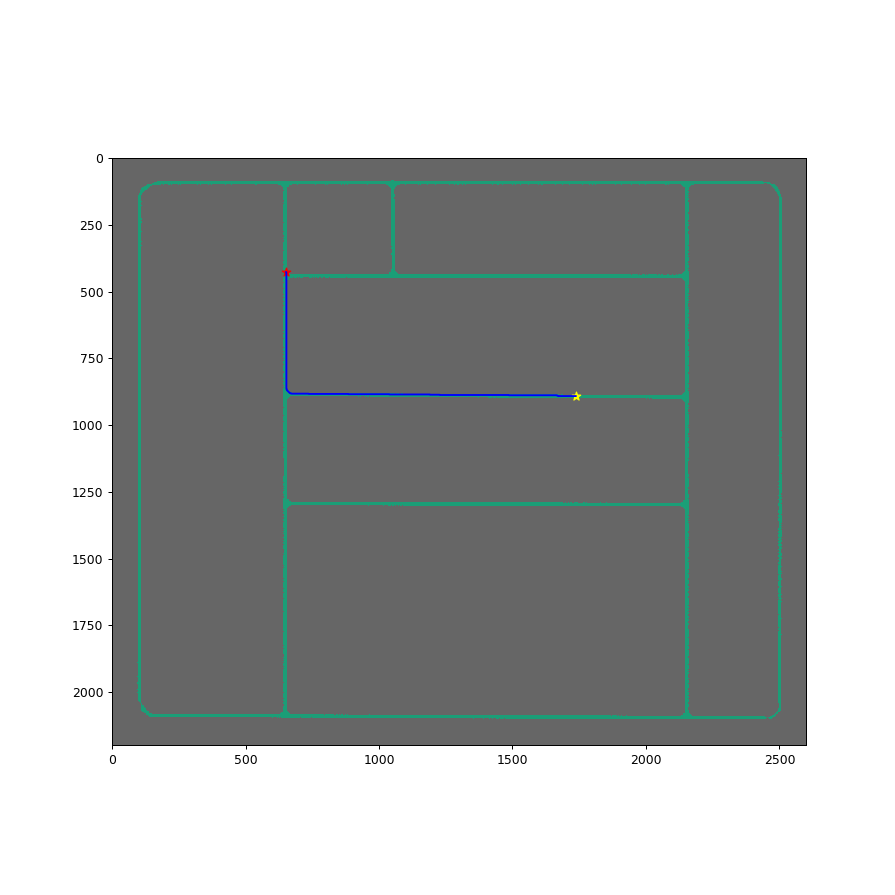

In [18]:

route = astar(skel_4, start_loc, goal_loc)
route = route + [start_loc]
route = route[::-1]
print(route)
x_coords = []
y_coords = []
for i in (range(0,len(route))):
    x = route[i][0]
    y = route[i][1]
    x_coords.append(x)
    y_coords.append(y)

fig, ax = plt.subplots(figsize=(10,10))

ax.imshow(skel_4, cmap=plt.cm.Dark2)
#ax.imshow(img,c)

ax.scatter(start_loc[1],start_loc[0], marker = "*", color = "yellow", s = 50)

ax.scatter(goal_loc[1],goal_loc[0], marker = "*", color = "red", s = 50)

ax.plot(y_coords,x_coords, color = "blue")

plt.show()

In [12]:
plt.savefig("image2.png")

In [ ]:
figure = matplotlib.pyplot.figure(  )
plot   = figure.add_subplot ( 111 )
plot.plot(pix_1.T[0],pix_1.T[1])
plot.imshow(cv2_view_image)

### Creating Waypoints from output

In [ ]:
#print(route)
print(len(route))
x_coordinates = []
y_coordinates = []
for i in range(0, len(route)):
    x_index = route[i][1] * cm_per_pixel
    x_index = x_index - world_to_map_translation + map_offset
    y_index = route[i][0] * cm_per_pixel 
    y_index = y_index - world_to_map_translation + map_offset
    
    x_coordinates.append(int(x_index[0]))
    y_coordinates.append(int(y_index[0]))

In [ ]:
print(x_coordinates,y_coordinates)

In [ ]:
#Hyper parameter that indicates the number of waypoints between two points
alpha_w = 200 # uncertainty of 1 
n_waypoints= int(len(route) / alpha_w)
x_waypoints = []
y_waypoints = []
v_waypoints = []

#take velocity from waypoints 
############Just for testing purposes remove afterwards###############
counter_n_waypoints = 0
with open('course4_waypoints.txt') as f:
    lines = f.readlines()
    v = [line.split()[2] for line in lines]
for i in range(0,len(v)):
    v_way = v[i].split(',')
    v_waypoints.append(float(v_way[0] ))
#####################################################################


for i in range(0,len(route)):
    if i % n_waypoints  == 0:
        x_waypoints.append(x_coordinates[i])
        y_waypoints.append(y_coordinates[i])
        counter_n_waypoints += 1
        #Just for testing purposes remove afterwards
        if counter_n_waypoints > 86:
            v_waypoints.append(2.5)
    #Just for testing purposes remove afterwards

In [ ]:
np.savetxt('test_ID003_8.txt',np.transpose([x_waypoints,y_waypoints,v_waypoints]),fmt='%1.3f',delimiter = ',')

In [ ]:
img_re = cv2.imread('Town01.png', cv2.IMREAD_GRAYSCALE)
fig = plt.figure()
ax = plt.axes()
plt.gca().invert_yaxis()
ax.plot(x_waypoints,y_waypoints)


In [ ]:
img_re = cv2.imread('Town01Central.png', cv2.IMREAD_UNCHANGED)
#img_re = cv2.cvtColor(img_re, cv2.COLOR_BGR2RGB)

In [ ]:
plt.imshow(img_re)

In [ ]:
small_element = cv2.getStructuringElement(cv2.MORPH_CROSS,(10,10))

In [ ]:
temp = cv2.dilate(img_re,small_element)

In [ ]:
plt.imshow(temp)

In [ ]:
cv2.imwrite("Image.png",cv2.cvtColor(temp, cv2.COLOR_RGB2RGBA))

In [ ]:

alpha = temp[:,:,3]
result = np.dstack([temp, bgr]) # Add the alpha channel

cv2.imwrite('51IgH_result.png', result)

<IPython.core.display.Javascript object>


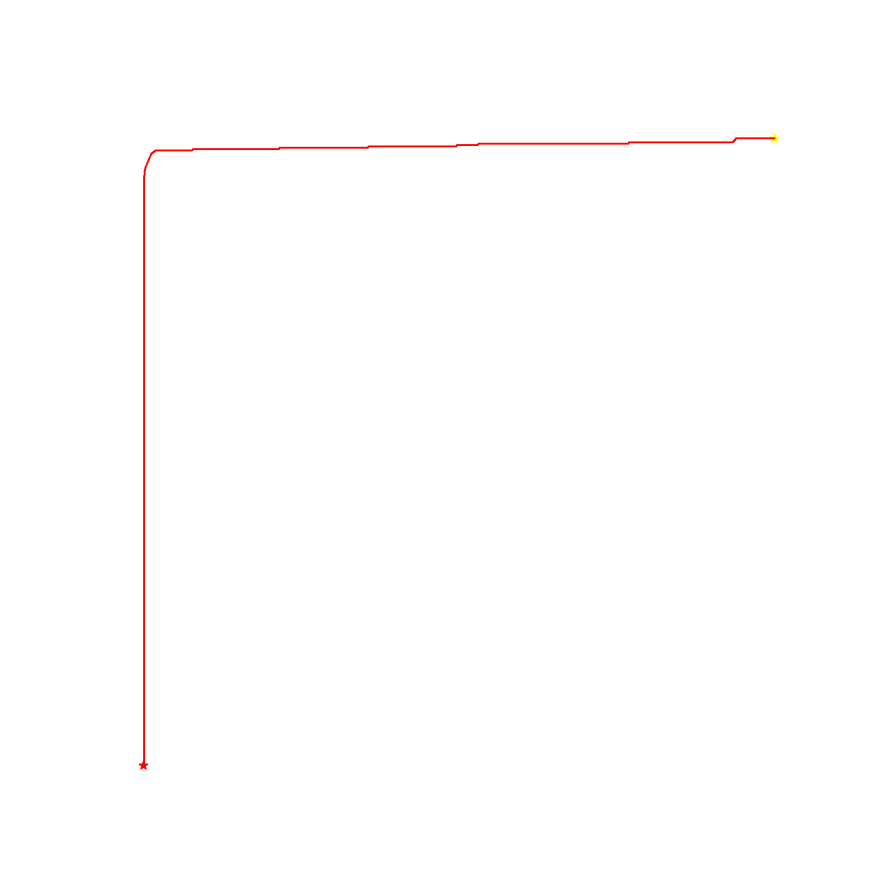

In [25]:

fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(start_loc[1],start_loc[0], marker = "*", color = "yellow", s = 50)

ax.scatter(goal_loc[1],goal_loc[0], marker = "*", color = "red", s = 50)
plt.plot(y_coords,x_coords, color = "red")
plt.axis('off')
plt.savefig("2.png", transparent=True)